In [11]:
import yaml
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [12]:
p1 = pd.read_csv("../data/wp_yaw_const.txt", header=None)
p1

,0,1,2,3
0,909.480,1128.67,0.0,0.000000
1,909.486,1128.67,0.0,0.000000
2,909.500,1128.67,0.0,0.000000
3,909.510,1128.67,0.0,0.000000
4,909.522,1128.67,0.0,0.000000
5,909.612,1128.67,0.0,0.000000
6,909.690,1128.67,0.0,0.000000
7,909.786,1128.67,0.0,0.000000
8,909.900,1128.67,0.0,0.000000
9,909.986,1128.67,0.0,0.000000


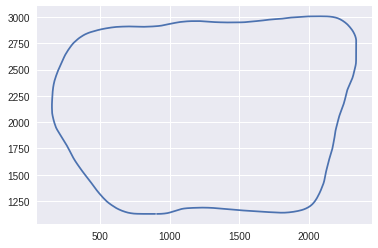

In [13]:
plt.plot(p1[0], p1[1])

In [14]:
p1.describe()

,0,1,2,3
count,10902.000000,10902.000000,10902.0,10902.000000
mean,1358.960436,2124.526535,0.0,181.011597
std,809.885411,694.536747,0.0,102.784212
min,155.794000,1128.670000,0.0,0.000000
25%,479.727250,1425.812500,0.0,79.980400
50%,1559.840000,2151.930000,0.0,183.259500
75%,2151.730000,2885.252500,0.0,277.554000
max,2339.440000,3005.740000,0.0,359.937000


In [15]:
stream = open("./src/tl_detector/sim_traffic_light_config.yaml", "r")
docs = yaml.load_all(stream)
a = {}
for doc in docs:
    for k,v in doc.items():
        if k == "camera_info":
            print(k, "->", v)
            a = v
    print("\n")
    
v = np.array(v)

camera_info -> {'focal_length_y': 1.73205, 'focal_length_x': 0.97428, 'image_width': 800, 'image_height': 600}




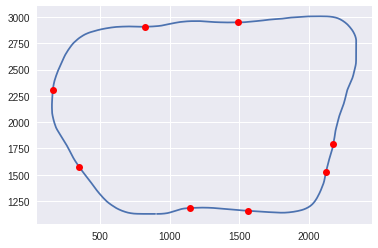

In [17]:
plt.plot(p1[0], p1[1])
plt.plot(v[:,0], v[:,1], 'ro')

In [18]:
l_loginfo = []
with open("./log.first_success_round.txt", "r") as f_input:
    for line in f_input:
        if line[0:6] != "[WARN]":
            continue
        
        f = re.split("\[|\]|\(|\)|,", line)
        l_loginfo.append([float(f[3]), f[4], float(f[5]), float(f[6])])

In [19]:
pp = pd.DataFrame(l_loginfo)
pp

,0,1,2,3
0,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
1,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
2,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
3,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
4,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
5,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
6,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
7,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
8,1.507785e+09,: =====Current Car Position:,1131.220,1183.270
9,1.507785e+09,: =====Current Car Position:,1131.220,1183.270


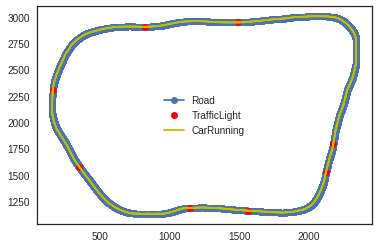

In [25]:
sns.set_style("white")

plt.plot(p1[0], p1[1], '-o', label="Road")
plt.plot(v[:,0], v[:,1], 'ro', label="TrafficLight")
plt.plot(pp[2], pp[3], 'y', label="CarRunning")
plt.legend()

In [32]:
pd_cte_speed = pd.read_csv("./log.first_success_round.cte_speed.txt", sep=" = ", header=None)
pd_cte_d     = pd.read_csv("./log.first_success_round.cte_d.txt", sep=" = ", header=None)


/home/huboqiang/miniconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/huboqiang/miniconda3/envs/carnd-term3/lib/python3.5/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


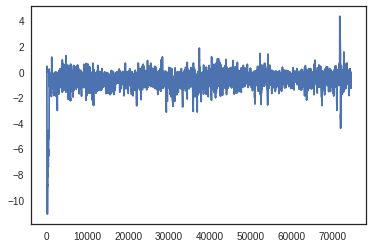

In [33]:
plt.plot(pd_cte_d[1])

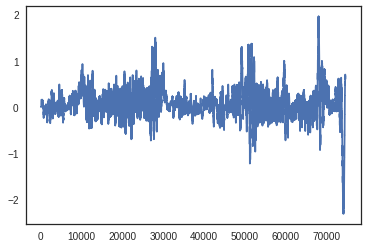

In [34]:
plt.plot(pd_cte_speed[1])